
# 本周内容的概括：
 - 贝叶斯网络
 - 连一块算概率的那个

# 1. 贝叶斯计算

贝叶斯网络也叫似然概率图形模型

这是一种非常强大的表征，帮助我们把概率模型扩展到实际问题上

贝叶斯公式的解释：

$$
\begin{aligned}采集到的数据证明假设为真的概率
 &= \frac{假设为真的时候收集到此数据的概率*收集数据前假设为真的概率}{此数据发生的可能性}\\
 &= 假设为真的概率*\frac{假设发生的情况下新证据发生的几率}{新证据本身发生的几率}

 
 \end{aligned}$$

例子：

$$

得病的几率 = \frac{得病后测出阳的概率*得病的概率}{得病后测阳的概率+没得测阳的概率}

$$

> 总结：
> - 贝叶斯允许我们用获得的数据计算假设成真的似然度

# 2. 贝叶斯网络（有向似然图模型）

贝叶斯网络是一个有向图，每个节点包含一个概率信息。这个计算是棘手（intractable）的。

> **贝叶斯网络：**
> - 每个节点都和某个变量相关联（离散或连续都可能）
> - 边代表一种影响
> - 是有向无环（directed acyclic）图（不存在有向的循环）
> - 每个节点$x_i$都有有条件的概率分布 $P(x_i|Parents(x_i))$, 即爹发生的条件下我发生的概率


例子：计算某事件发生的概率：

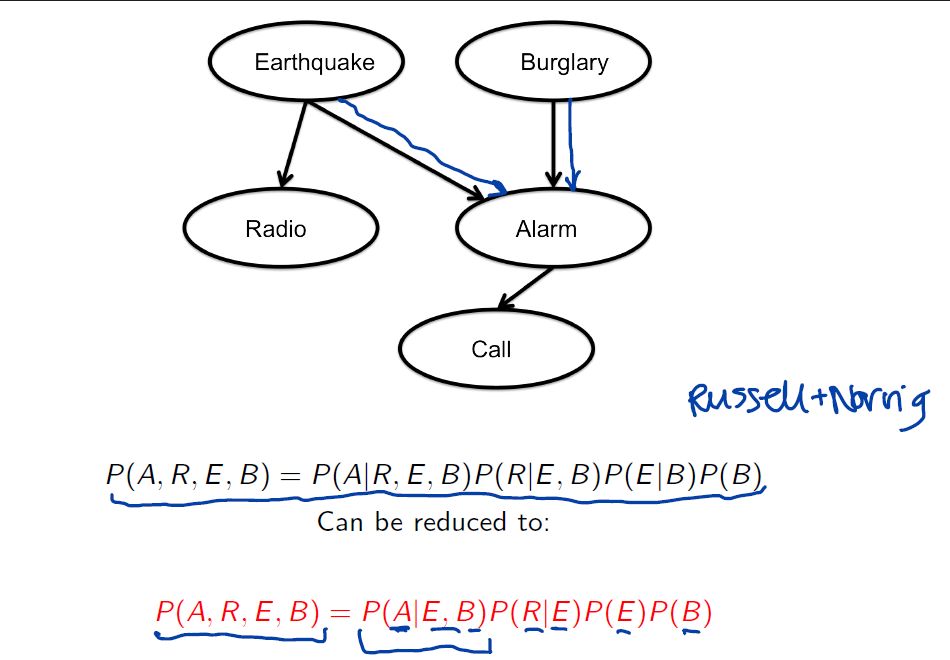

> **有条件的独立性：**
> 
> 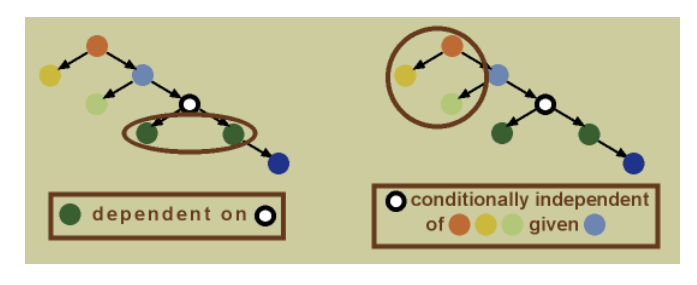
>
> - 左图中：绿节点取决于白节点
> - 右图中：如果蓝点值是给定的，那白点就算是*有条件地独立于橙黄浅绿三个点*

# 3. 马尔可夫毯

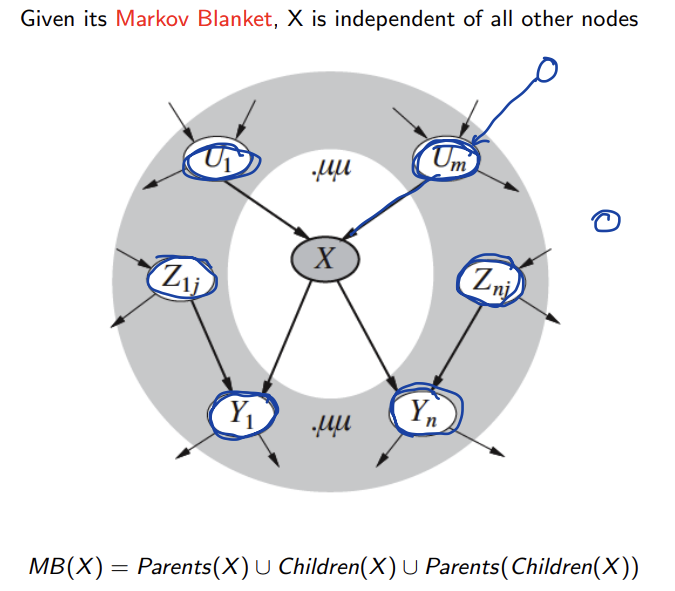

> 一个节点只需要附近这几个节点的信息：
>  - 父节点
>  - 子节点
>  - 子节点的父节点们

# 4. Marginalisation(确定的子节点对父节点会产生影响)

图例  

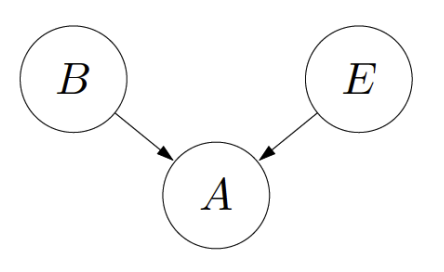  

> Marginalisation:
>  - 对叶子结点的marginalisation会得到一个不含这个叶子结点的贝叶斯网络
>  - 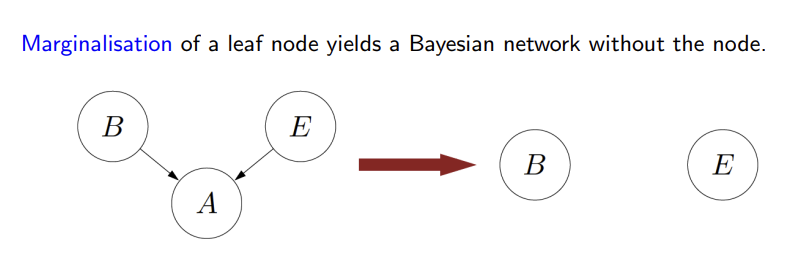

> Explaining Away:
>  - 如果两个原因都对一个结果有正面影响，那如果结果被确定，则一个原因的确定就会影响另一个原因的值
>  - 例如：下图中，H和I都发生了，那你觉得你的原因是C和A里的哪个？
>  -  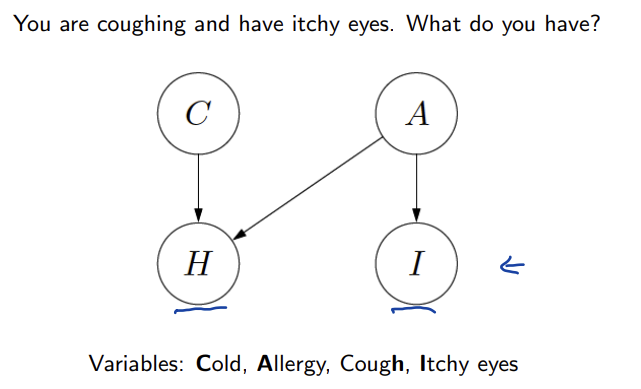
>
>
> - 例题：
>   - 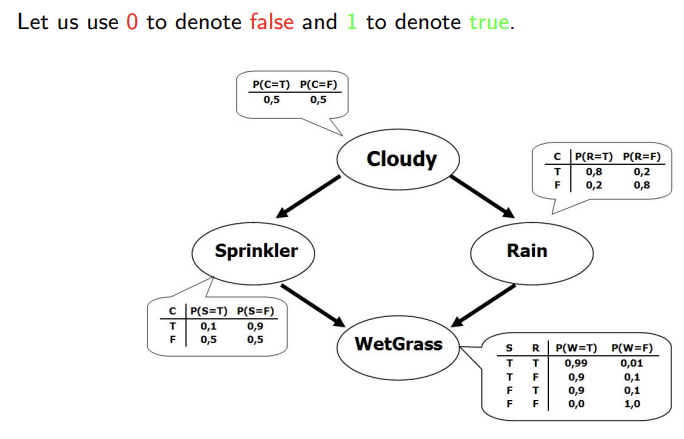
>   - P(S=1)的marginal似然度是啥？
> - 解：
>   - $$\begin{aligned} P(S=1) &= S=1的所有情况概率相加\\ &=\sum\limits_{C}\sum\limits_{R}\sum\limits_{W} P(C,R,W,S=1)\\ &=\sum\limits_{C}\sum\limits_{R}\sum\limits_{W}P(C)P(S=1|C)P(R|C)P(W|S=1,R) \end{aligned}$$
>   - 把上式展开（实际上就是遍历状态空间）
>   - 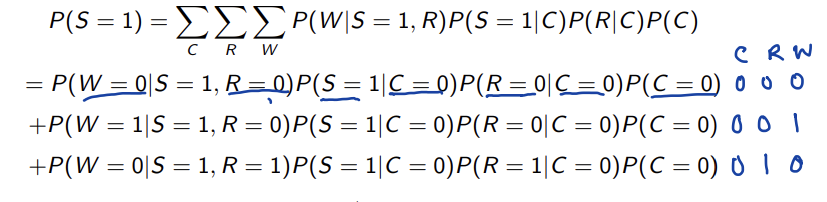
>   - 化简：
>   - 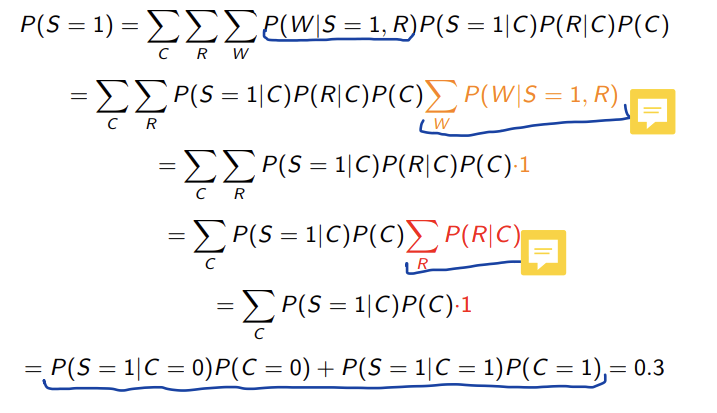
>   - <font size=15><font color="red">此处的化简我不懂！，周四上课有人问</font></font>

> - 如果我们希望同时计算几个边际成本，可以考虑使用动态编程，来避免多余的计算
> - 精确算法对小图或者树形（以及类似树形）的图很有效。
> - 但是对于大型的密集连接图，我们需要使用本课程以外的算法：
>   - variational methods
>   - 采样（蒙特卡洛）方法：Gibbs抽样

> 总结：
>  - 贝叶斯网络encodes a joint distribution over the variables
>  - 我们可以通过对joint distribution的边缘化（Marginalising）来计算不同的似然度
>  - 大图就需要更复杂的手法


# 5. 动态模型


动态贝叶斯模型是用来描述随机过程的有向图

> > 动态贝叶斯模型：
> 1. 扩展贝叶斯模型以利用时域
>   - 马尔可夫假设：未来与过去独立
>   - 静止性：过度模型对于时域变化是稳定的
> 2. 状态用随机变量来描述
> 3. 每个变量都取决于有限数量的其他变量
> 
> 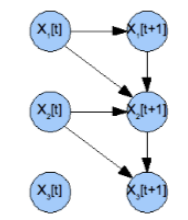

> > 马尔科夫链
> - 定义：一系列随机变量，每个都有条件地只取决于前面的变量。
> - 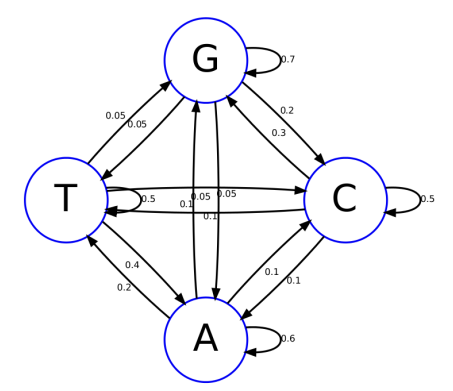
> - 几个种类：
>   - Fuly Joint：全连接。某一状态的似然性分布取决于所有的前态
>   - 一阶：某一状态的似然性分布仅取决于一个前态
>   - 二阶：某一状态的似然性分布仅取决于两个前态

> > 隐藏式马尔可夫模型（HMM）
>  - 最简单的一种动态贝叶斯网络
>  - 只有一个隐藏节点，每个时间片只有一个连续或离散的被观察节点
>  - 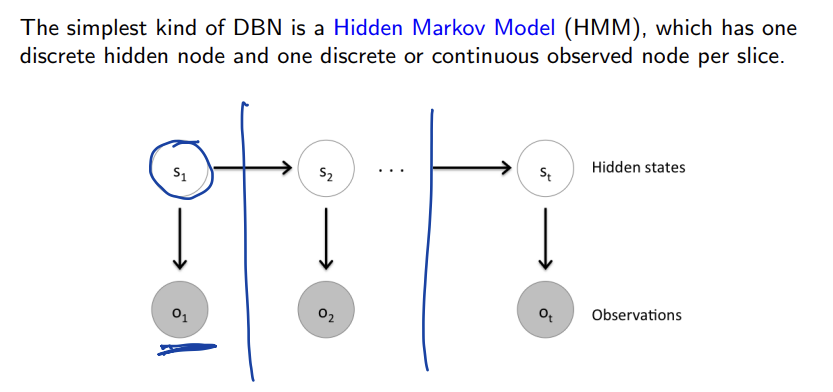
>  - 总体来说，我们假设有一个初始分布$P(s_1)$，一个转移模型$P(s_t|s_{t-1})$，和观察模型$P(o_t|s_t)$

> >
> > 总结：
> >
> - 贝叶斯网络可以被改造为包含时域信息的样子
> - 马尔可夫链包含到某个点为止的时间信息
> - 隐藏马尔可夫模型允许我们根据它们产生的输出来推断隐藏变量的存在。

# 6. 作业
## 1. X和Y是两个独立的bool量 (即，$P(X,Y) = P(X)P(Y)$)
 - (a) 给出一个两个变量相互独立的例子
 - (b) 计算如下的似然度表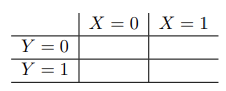
 - (c) 确定一组（a,b）的值，使X，Y独立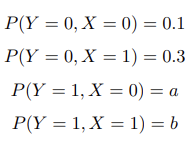

解：  
（a）：两次投骰子，每次都从完全一样的初始条件中投出  
（b）:我不明白这是想考啥，我觉得和标题那个公式一样，没得可写  
（c）:我猜a=0.1，b=0.3，这样Y才不影响X的分布。  

## 2. 算PPT p42和p44的题  

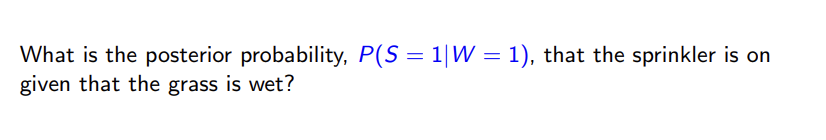

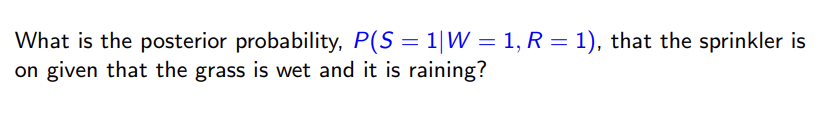

不想算了，明天听完化简的讲解再算

## 3. 诊断  
 一个病人有症状`S`，原因有两个：`A`，`B`，基因`G`对`A`的出现有很大影响。
 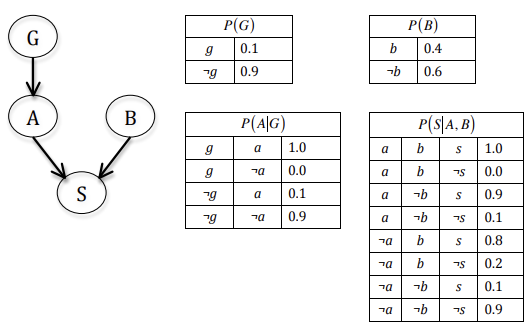

  - （a）：病人有A的几率
  - （b）：病人有B的情况下，病人有A的几率
  - （c）：如果我们知道病人有B，S，那病人有A的几率？

 解：  
 （a）：有G得A+没G得A = A  
 $P(A=1|G=0)+P(A=1|G=1) = 0.1*1.0+0.9*0.1 = 0.19 $ 

（b）：无关所以不变，还是0.19

（c）：$P(A=1|B=1，S=1) = \frac{P(A=1,B=1,S=1)}{P(S=1,B=1)}$

$P(A=1,B=1,S=1):0.19*0.4*1$

$P(S=1,B=1) = P(A=1,S=1,B=1)+P(A=0,S=1,B=1) = 上式+(1-0.19)*0.4*0.8$

## 4. 对于以下的贝叶斯网络：
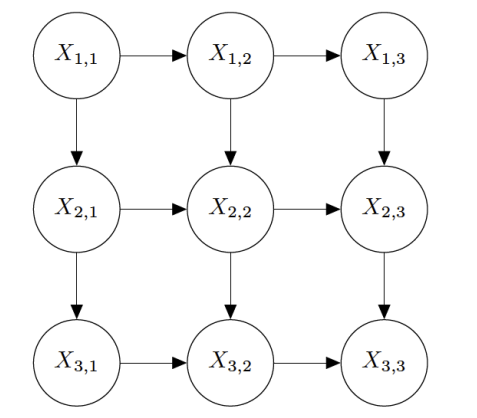  
（a）：哪个变量对$X_{3,1}$独立？

（b）：哪个随机变量在$X_{1,1}$确定的情况下仍然对$X_{3,1}$独立？

解：
http://web.mit.edu/jmn/www/6.034/d-separation.pdf
用这个算法判断。

- 把提到的所有节点留下
- 再添上上述节点的所有祖先
- 如果上述节点中有两个节点共享一个后代的，连接他们
- 去除given节点和其边
- 读结果：对于待判断的点（即题干中除given以外的点）：
  - 如果待判断的点之间没有通路：一定独立
  - 如果图中的点相互独立：不保证独立。
  - 如果其中一个或两个节点都没了：它们独立
